In [0]:
# Importing the libraries required.
import os
import pandas as pd
import numpy as np
import nltk 
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import math
#from nltk.stem import PorterStemmer as ps
from nltk.stem import PorterStemmer
import io 
from nltk.corpus import stopwords 
import string
from nltk.corpus import stopwords
from nltk.tokenize import wordpunct_tokenize
import re
from sklearn.cluster import DBSCAN
from nltk.util import ngrams
from statistics import median 
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
import string
from sklearn.metrics import silhouette_score
import numpy as np 
import pandas as pd
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
import scipy.stats as ss
from sklearn.mixture import GaussianMixture
from spellchecker import SpellChecker
spell = SpellChecker()
from sklearn.decomposition import PCA
import seaborn as sns
import csv
import time

ps = PorterStemmer() 

In [0]:
# Get the current Working Directory
print(os.getcwd())
# Changing the working directory
os.chdir('C:\\IISc Documents\\Final Year Project\\Complaint Data Set\\Python Files')

'C:\\IISc Documents\\Final Year Project\\Complaint Data Set\\Python Files'

In [0]:
# Reading the temporary dataset file
df = pd.read_csv('Complaints.csv', dtype={"ORIG_EQUIP_YN": object, "DEALER_NAME": object , "DEALER_TEL": object , "DEALER_CITY": object , "DEALER_STATE" : object })
df.head()

In [0]:
# Trying to identify the length of each complaint
def get_complaint_length(df):
    Words_in_CDESCR = []
    for i in range(len(df.CDESCR)):
        temp = len((df['CDESCR'][i]).split())
        Words_in_CDESCR.append(temp)
    return Words_in_CDESCR

In [0]:
# Adding the length of words in complaint column to the dataframe
df['Words_in_CDESCR'] = get_complaint_length(df)

In [0]:
# Printing the median, max and min for the Words/Complaint
print("Median no of words per complaint is" + " " + str(median(df['Words_in_CDESCR']))) 
max_value_original_list = max(Words_in_CDESCR)
print("Max no of words per complaint is" + " " + str(max_value_original_list))
min_value_original_list = min(Words_in_CDESCR)
print("Min no of words per complaint is" + " " + str(min_value_original_list))

Median no of words per complaint is 13.0
Max no of words per complaint is 231
Min no of words per complaint is 1


In [0]:
df.CDESCR.head()

0                    ABS SYSTEM FAILURE, AT 20MPH.  TT
1    PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAG...
2    UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPL...
3    THE STRUT WAS BAD THERE IS A NOISE ON THE PASS...
4    THE STRUT WAS BAD THERE IS A NOISE ON THE PASS...
Name: CDESCR, dtype: object

In [0]:
# Copying the original complaint column to another column and keeping it for reference
df['CDESCR_Original'] = df['CDESCR']

In [0]:
# First Step for Data - preprocessing - Converting all the complaints to one case ( in my case I have preferred the lower case)
df.CDESCR = df.CDESCR.str.lower()

In [0]:
# Creating the original word list - List of all the words & punctuations present in the entire database
def get_count_words(CDESCR):
    word_list_Original = []
    # For each sentence in the complaint column in the database 
    for sent in CDESCR:
    # Tokenize the sentence     
        temp = word_tokenize(sent)
    # Appends each word in the complaint to a list
        word_list_Original.append(temp)
    return word_list_Original

In [0]:
# Creates a dictionary for the above Original word list 
def get_count_dict(CDESCR):
    word_count_dict_original = {}
    for i in get_count_words(CDESCR):
        for j in i:
            if j not in word_count_dict_original:
                word_count_dict_original[j]=1
            else:
                word_count_dict_original[j]=word_count_dict_original[str(j)]+1
    return word_count_dict_original

In [0]:
# Length of the word count dicitionary - Also depcits the number of distinct/unique words in the entire corpus without any pre-processing
word_count_dict_original = get_count_dict(df.CDESCR)
len(word_count_dict_original)

27140

In [0]:
word_list_Original_spell = list(word_count_dict_original.keys())

In [0]:
# Creating a copy for the dataframe
df1 = df.copy()

In [0]:
# Using regular expressions to remove punctuations and special characters
# Input --> s = "how much for the maple syrup? $20.99? That's ridiculous!!!"
# Output --> s = "how much for the maple syrup   20 99  That s ridiculous"
def remove_punct(CDESCR):
    for i in range(len(CDESCR)):
        sent = CDESCR[i]
        CDESCR[i] = re.sub(r'[^\w]', ' ', sent)
    return CDESCR

In [0]:
df.CDESCR = remove_punct(df.CDESCR)

In [0]:
# Extracting the output of above code in a file since it takes long time to run
df1.to_excel("df1.xlsx",sheet_name='Removing_Punctuation')

In [0]:
#Read the dataframe after removing the punctuation
df2 = pd.read_csv('df1.csv', dtype={"ORIG_EQUIP_YN": object, "DEALER_NAME": object , "DEALER_TEL": object , "DEALER_CITY": object , "DEALER_STATE" : object })

In [0]:
# Checking for duplicates 
len(df2)-len(df2.drop_duplicates())

0

In [0]:
# Length of the word count dicitionary - Also depcits the number of distinct/unique words in the entire corpus without any pre-processing
word_count_dict_original_spellcheck = get_count_dict(df2.CDESCR)
len(word_count_dict_original_spellcheck)

17974

In [0]:
# Assigning the words from original dictionary to a list
word_list_Original_spell = list(word_count_dict_original_spellcheck.keys())

In [0]:
# Set containing the list of mispelled words
misspelled = spell.unknown(word_list_Original_spell)

In [0]:
type(misspelled)

set

In [0]:
len(misspelled)

7012

In [0]:
# Code for correcting the incorrect spellings as per the above dictionary
def correct_spellings(CDESCR):
  sent_list = []
  for sent in CDESCR:
      new_sent = []
      for word in sent.split():
          if word not in misspelled:
              new_sent.append(word)
          else:
              word_correct = spell.correction(word)
              new_sent.append(word_correct)
      sent_list.append(' '.join(new_sent))
  return sent_list


In [0]:
df2_Afterspellcheck = df2.copy()
df2_Afterspellcheck['CDESCR'] = correct_spellings(df2.CDESCR)

In [0]:
df2.CDESCR[30014]

'while driving comsumer says steering wheel wobbles while driving  2 bolts are loose   he calls the dealer they said they would fix the car but not for free   tt'

In [0]:
df2_Afterspellcheck.CDESCR[30014]

'while driving comsumer says steering wheel wobbles while driving  2 bolts are loose   he calls the dealer they said they would fix the car but not for free   tt'

In [0]:
# Extracting the output of above code in a file since it takes long time to run
df2_Afterspellcheck.to_excel("df2_Afterspellcheck.xlsx",sheet_name='After Spelling Correction')

In [0]:
#Read the dataframe after removing the punctuation
df3 = pd.read_csv('df2_Afterspellcheck.csv', dtype={"ORIG_EQUIP_YN": object, "DEALER_NAME": object , "DEALER_TEL": object , "DEALER_CITY": object , "DEALER_STATE" : object })

In [0]:
# Length of the word count dicitionary - Also depcits the number of distinct/unique words in the entire corpus without any pre-processing
word_count_dict_after_spellcheck = get_count_dict(df3.CDESCR)
len(word_count_dict_after_spellcheck)

13425

In [0]:
# Assigning the words from original dictionary to a list
word_list_after_spell = list(word_count_dict_after_spellcheck.keys())

In [0]:
# Set containing the list of mispelled words
misspelled_after_spell = spell.unknown(word_list_after_spell)

In [0]:
misspelled_after_spell

{'000miles',
 '000rpm',
 '0146gdm',
 '014bab',
 '014blg',
 '014gdm',
 '014jgb',
 '014ndm',
 '02014gdm',
 '02015pld',
 '0201deme',
 '02084blg',
 '02157tck',
 '02257ctn',
 '02399sra',
 '02424oxf',
 '02504bho',
 '025mft',
 '025mst',
 '02731mmf',
 '02732mmfchild',
 '02751mtf',
 '0279pjf',
 '084mmf',
 '094mfrd',
 '1000ste',
 '100mph',
 '1100lbs',
 '110lbs',
 '1165auf',
 '125lbs',
 '135mph',
 '157tck',
 '187paf',
 '1995for',
 '1fdnf0c4wva04234',
 '1fdnf80c8wva04236',
 '1fdpj75pokva59531',
 '1fmdu34x1rub08319',
 '1hvbbabp3sh202493',
 '1hvbbabpxsh202491',
 '2000ste',
 '200rpm',
 '207removable',
 '292gxy',
 '299bho',
 '2falp71w0tx167988',
 '2falp71w8sx177942',
 '2falp71w8sx177944',
 '3000rpm',
 '3000rpms',
 '3500ste',
 '36822wyx',
 '36rkss',
 '399bab',
 '399ncb',
 '4000rpm',
 '40pmh',
 '4163bjf',
 '4163mdf',
 '4163mds',
 '4165mcl',
 '4169sfw090495',
 '4169ssw',
 '4170gfo',
 '424gdm',
 '4263mus',
 '4265bhl082595',
 '4265laf',
 '4265tmf',
 '4365bsf',
 '4365prf',
 '4485waf',
 '4525afp',
 '4525btk0

In [0]:
len(misspelled_after_spell)

577

In [0]:
# Downlaod the package for the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shaunakhanda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
# Updating the stop words as per the new words that I come across from the database
stop_words = set(stopwords.words('english'))
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}' , '%' , '*' , '**ak' , 'tt' , '*tt' , '**ea-**' , '*a' , '*aj' , '@' , '*ak' , '*skd' ,'*aw' , '*slc' , '*yh','*tt' ,'*dsh' , '*dh' , '*tw', '*sd' ,'*ak' ,'*jb' , '//' , '/' , '*nlm' , '%' , '@' , '**ak' , '*a' , '*ak*jb' , '*' , '*yd' , '*k' , '.ak' , '..' , '*ak*ak' , '*ml' , '*et' , '*skd' , '*aqk' , '/r' , '*al' , '[' , '+' , '/p' , '*dsh' , '|' , '*azk' , '*ta' , '/..' , 'aaa' ,'*sdk','*akk' ,'*aj' ,'*ake' ,'*tt' ,'./' ,'*akg' ,'>' ,'*dh' ,'/-' ,'///' ,']' ,'*akw' '**ea-**' ,'*alk','*skdd','*sk' ,'*tw','*skk' ,'*w' ,'*scl' ,'*amk' ,'\\' ,'*akd' ,'*akme' ,'a*ak' ,'*akp' , ',-' ,'*uak' ,'..*jb' ,'*d' ,'*aks' ,'*dhz' ,'*s' ,'/r-' , '*e' ,'-/' ,'*yh' , '////' ,'aa' ,'*dup' ,'*lj' ,'*an' ,'*aj\k' ,'*ak.et' ,'//r' ,'//-' ,'.l' ,'//.' , '/' , 'k',	'/',	'e',	'%',	'w',	'f',	'@',	'v',	'c',	'h',	'g',	'n',	'|',	'r',	's',	'[',	'x',	't',	'p',	'b',	'*',	'z',	'o',	'l',	'm',	'i',	'+',	'j',	'>',	'd',	'u',	'y',']' , 'v-',	'gt',	'ak',	'//',	'rd',	'wd',	'cd',	'v.',	'ct',	'sp',	'th',	's',	'tt',	'wa',	'mx',	'hm',	'tk',	'mr',	'gm',	'ea',	'rr',	'*a',	'il',	'c-',	'ck',	'cj',	'*k',	'rv',	'ge',	'bf',	'wk',	'ng',	'cb',	'ai',	'b.',	'pt',	'aw',	'pe',	's-',	'pm',	'gl',	'yp',	'*w',	'..',	'yy',	'w/',	'eb',	'-k',	'c.',	'rt',	'i/',	'hr',	'nt',	'jb',	'al',	'ly',	'v/',	'-p',	'el',	'tf',	'ba',	'fu',	'e-',	'mi',	'cu',	'kt',	'ou',	'pr',	'pf',	'va',	'am',	'zr',	'hs',	'ho',	'ot',	'pj',	'bb',	'yo',	'tp',	'lp',	'ky',	'az',	'-j',	'\\',	'ax',	'ii',	'vw',	'td',	'rs',	'te',	'e.',	'./',	'eg',	'yr',	'/p',	'tx',	'pa',	's.',	'pl',	'i-',	'ga',	'la',	'ny',	'md',	'co',	'hw',	'mp',	'ne',	'dr',	'ln',	',-',	'nm',	'vo',	'ws',	'ph',	'j.',	'g/',	'*d',	'ad',	'oe',	'rz',	'sd',	'zx',	'dh',	'xp',	'ag',	'fo',	'ps',	'ha',	'ce',	'oo',	'wn',	'mt',	'*s',	't',	'sv',	'xw',	'vc',	'ah',	'-v',	'sb',	'ta',	'p/',	'k.',	'nj',	'sl',	'h-',	'-c',	'sc',	'uf',	'ff',	'ed',	'io',	'bu',	'*e',	'sm',	'fl',	'vt',	'sr',	'er',	'ms',	'xt',	'/x',	'dp',	'tn',	'sz',	'le',	'pi',	'aa',	'p-',	'ar',	'jl',	'gs',	'ti',	'ir',	'ap',	'mo',	'lt',	'f-',	'ry',	'ro',	'bs',	're',	'da',	'.l',	'f.',	'rh'])

custom_stop_words = ['vehicle',	'causing',	'driving',	'driver',	'consumer',	'please',	'dealer',	'describe',	'accident',	'due',	'also',	'problem',	'times',	'resulting',	'details',	'went',	'would',	'came',	'states',	'upon',	'end',	'applying',	'open',	'coming',	'twice',	'problems',	'drivers',	'still',	'could',	'took',	'goes',	'go',	'two',	'without',	'properly',	'another',	'drive',	'extended',	'experienced',	'making',	'comes',	'going',	'master',	'come',	'deployment',	'put',	'poor',	'one',	'compartment',	'weather',	'excessive',	'high',	'noticed',	'get']
stop_words.update(custom_stop_words)

In [0]:
# To check the list containing the stop words
#stop_words

In [0]:
# Data Pre-processing step 2 - removing numbers and stop words from the database
def pre_process(CDESCR):
  sent_list = []
  for sent in CDESCR:
      sent = "".join(i for i in  sent if not i.isdigit())
      sent = sent.split()
      new_sent = []
      for w in sent:
          if w not in stop_words:
              new_sent.append(w)
      sent_list.append(' '.join(new_sent))
  return sent_list

In [0]:
df4 = df3.copy()

In [0]:
# Above created sent_list is the sentences/complaints after removing the stops words and digits
df4.CDESCR = pre_process(df3.CDESCR))

In [0]:
df4.CDESCR[:7]

['abs system failure mph',
 'parked flat surface emergency braking engaged rolled rearward',
 'frontal collision air bag failed deploy classified totalled',
 'strut bad noise passenger side door engine light malfunction',
 'strut bad noise passenger side door engine light malfunction',
 'front tires show wear steel belts nissan offering replace tires',
 'brake pedal push rod retainer installed brakes fail recall repairs']

In [0]:
df4.CDESCR[31581] == ""

True

In [0]:
df4.CDESCR.head()

0                               abs system failure mph
1    parked flat surface emergency braking engaged ...
2    frontal collision air bag failed deploy classi...
3    strut bad noise passenger side door engine lig...
4    strut bad noise passenger side door engine lig...
Name: CDESCR, dtype: object

In [0]:
df4.CDESCR[382]

'rough idle'

In [0]:
# Length of the word count dicitionary - Also depcits the number of distinct/unique words in the entire corpus without any pre-processing
word_count_dict_after_spellcheck_after_removing_digit = get_count_dict(df4.CDESCR)
len(word_count_dict_after_spellcheck_after_removing_digit)

10396

In [0]:
word_count_dict_after_spellcheck_after_removing_digit

{'abs': 8982,
 'system': 5013,
 'failure': 7514,
 'mph': 5986,
 'parked': 1630,
 'flat': 164,
 'surface': 316,
 'emergency': 1095,
 'braking': 2865,
 'engaged': 315,
 'rolled': 508,
 'rearward': 52,
 'frontal': 1350,
 'collision': 2349,
 'air': 7223,
 'bag': 3659,
 'failed': 15746,
 'deploy': 3616,
 'classified': 2,
 'totalled': 481,
 'strut': 234,
 'bad': 421,
 'noise': 3354,
 'passenger': 5206,
 'side': 8621,
 'door': 5694,
 'engine': 7304,
 'light': 4191,
 'malfunction': 1183,
 'front': 10565,
 'tires': 1394,
 'show': 44,
 'wear': 1678,
 'steel': 119,
 'belts': 1719,
 'nissan': 38,
 'offering': 3,
 'replace': 1222,
 'brake': 14953,
 'pedal': 5494,
 'push': 169,
 'rod': 666,
 'retainer': 106,
 'installed': 411,
 'brakes': 17769,
 'fail': 1126,
 'recall': 4460,
 'repairs': 994,
 'stalls': 1117,
 'speed': 3055,
 'loss': 3254,
 'steering': 8121,
 'ability': 287,
 'vehicles': 665,
 'sun': 168,
 'roof': 302,
 'glass': 326,
 'flew': 363,
 'rear': 10417,
 'middle': 691,
 'seat': 12817,
 'be

In [0]:
timestr = time.strftime("%Y%m%d-%H%M%S")
with open(timestr + 'df4_dictionary.csv', 'w') as csv_file:
    writer = csv.writer(csv_file)
    for key, value in word_count_dict_after_spellcheck_after_removing_digit.items():
       writer.writerow([key, value])

In [0]:
# Assigning the words from original dictionary to a list
word_list_after_spell_after_removing_digit = list(word_count_dict_after_spellcheck_after_removing_digit.keys())

In [0]:
# Set containing the list of mispelled words
misspelled_after_spell_after_removing_digit = spell.unknown(word_list_after_spell_after_removing_digit)

In [0]:
len(misspelled_after_spell_after_removing_digit)

510

In [0]:
# Finding the count of Words after removing the stop words
word_count_dict_after_Stop_Words = get_count_dict(df4.CDESCR)
len(word_count_dict_after_Stop_Words)

10396

In [0]:
word_count_dict_after_Stop_Words

{'abs': 8982,
 'system': 5013,
 'failure': 7514,
 'mph': 5986,
 'parked': 1630,
 'flat': 164,
 'surface': 316,
 'emergency': 1095,
 'braking': 2865,
 'engaged': 315,
 'rolled': 508,
 'rearward': 52,
 'frontal': 1350,
 'collision': 2349,
 'air': 7223,
 'bag': 3659,
 'failed': 15746,
 'deploy': 3616,
 'classified': 2,
 'totalled': 481,
 'strut': 234,
 'bad': 421,
 'noise': 3354,
 'passenger': 5206,
 'side': 8621,
 'door': 5694,
 'engine': 7304,
 'light': 4191,
 'malfunction': 1183,
 'front': 10565,
 'tires': 1394,
 'show': 44,
 'wear': 1678,
 'steel': 119,
 'belts': 1719,
 'nissan': 38,
 'offering': 3,
 'replace': 1222,
 'brake': 14953,
 'pedal': 5494,
 'push': 169,
 'rod': 666,
 'retainer': 106,
 'installed': 411,
 'brakes': 17769,
 'fail': 1126,
 'recall': 4460,
 'repairs': 994,
 'stalls': 1117,
 'speed': 3055,
 'loss': 3254,
 'steering': 8121,
 'ability': 287,
 'vehicles': 665,
 'sun': 168,
 'roof': 302,
 'glass': 326,
 'flew': 363,
 'rear': 10417,
 'middle': 691,
 'seat': 12817,
 'be

In [0]:
# Reading the temporary dataset file
#df_after_modification_Stemming = pd.read_csv('Complaint_after_modification.csv', dtype={"ORIG_EQUIP_YN": object, "DEALER_NAME": object , "DEALER_TEL": object , "DEALER_CITY": object , "DEALER_STATE" : object })

In [0]:
# Checking for Since Complaint ID 383 has empty space
df4.CDESCR[382]
print(df4.CDESCR[382])
#print(type(df1.CDESCR[382]))
#print(len(str(df1.CDESCR[382])))

rough idle


In [0]:
# Checking for Since Complaint ID 383 has empty space
ps.stem('rough')

'rough'

In [0]:
df5 = df4.copy()

In [0]:
# Stemming
def do_stemming(CDESCR):
  filtered_sentences_list_Stemming_temp = []
  filtered_sentences_list_Stemming = []
  word_list_Stemming = []
  for sent in CDESCR:
      temp = word_tokenize(sent)
      word_list_Stemming_for_sent = []
      for w in temp:
          word_list_Stemming.append(ps.stem(w))
          word_list_Stemming_for_sent.append(ps.stem(w))
      filtered_sentences_list_Stemming_temp =' '.join(word_list_Stemming_for_sent)
      filtered_sentences_list_Stemming.append(filtered_sentences_list_Stemming_temp)
  return word_list_Stemming,filtered_sentences_list_Stemming

In [0]:
word_list_Stemming,filtered_sentences_list_Stemming = do_stemming(df5.CDESCR)

['ab',
 'system',
 'failur',
 'mph',
 'park',
 'flat',
 'surfac',
 'emerg',
 'brake',
 'engag',
 'roll',
 'rearward',
 'frontal',
 'collis',
 'air',
 'bag',
 'fail',
 'deploy',
 'classifi',
 'total',
 'strut',
 'bad',
 'nois',
 'passeng',
 'side',
 'door',
 'engin',
 'light',
 'malfunct',
 'strut',
 'bad',
 'nois',
 'passeng',
 'side',
 'door',
 'engin',
 'light',
 'malfunct',
 'front',
 'tire',
 'show',
 'wear',
 'steel',
 'belt',
 'nissan',
 'offer',
 'replac',
 'tire',
 'brake',
 'pedal',
 'push',
 'rod',
 'retain',
 'instal',
 'brake',
 'fail',
 'recal',
 'repair',
 'stall',
 'speed',
 'loss',
 'steer',
 'brake',
 'abil',
 'stall',
 'speed',
 'loss',
 'steer',
 'brake',
 'abil',
 'vehicl',
 'sun',
 'roof',
 'glass',
 'flew',
 'rear',
 'middl',
 'seat',
 'belt',
 'refractor',
 'oper',
 'exhaust',
 'system',
 'fail',
 'brake',
 'system',
 'failur',
 'ab',
 'brake',
 'brake',
 'applic',
 'exhibit',
 'grind',
 'nois',
 'rear',
 'end',
 'foot',
 'brake',
 'shoulder',
 'belt',
 'restrain

In [0]:
df5.CDESCR.head()

0                               abs system failure mph
1    parked flat surface emergency braking engaged ...
2    frontal collision air bag failed deploy classi...
3    strut bad noise passenger side door engine lig...
4    strut bad noise passenger side door engine lig...
Name: CDESCR, dtype: object

In [0]:
df5.CDESCR = filtered_sentences_list_Stemming

In [0]:
df5.CDESCR.head()

0                                 ab system failur mph
1     park flat surfac emerg brake engag roll rearward
2    frontal collis air bag fail deploy classifi total
3    strut bad nois passeng side door engin light m...
4    strut bad nois passeng side door engin light m...
Name: CDESCR, dtype: object

In [0]:
# Extracting the output of above code in a file since it takes long time to run
timestr = time.strftime("%Y%m%d-%H%M%S")
#df5.to_excel("df5.xlsx",sheet_name='After_Stemming_CDESCR')
df5.to_excel(timestr + "df5.xlsx",sheet_name='After_Stemming_CDESCR')

In [0]:
len(word_list_Stemming)

855787

In [0]:
word_list_after_Stemming = []
for word in word_list_Stemming:
    word_list_after_Stemming.append(word)

In [0]:
#word_list_after_Stemming

In [0]:
len(word_list_after_Stemming)

855787

In [0]:
word_count_dict_after_Stemming = {}
for j in word_list_after_Stemming:
    if j not in word_count_dict_after_Stemming:
        word_count_dict_after_Stemming[j]=1
    else:
        word_count_dict_after_Stemming[j]=word_count_dict_after_Stemming[str(j)]+1

In [0]:
len(word_count_dict_after_Stemming)

6626

In [0]:
word_count_dict_after_Stemming

{'ab': 8984,
 'system': 5101,
 'failur': 7735,
 'mph': 5986,
 'park': 3851,
 'flat': 167,
 'surfac': 425,
 'emerg': 1101,
 'brake': 35607,
 'engag': 893,
 'roll': 1068,
 'rearward': 52,
 'frontal': 1350,
 'collis': 2394,
 'air': 7223,
 'bag': 5337,
 'fail': 17920,
 'deploy': 4999,
 'classifi': 2,
 'total': 1015,
 'strut': 541,
 'bad': 421,
 'nois': 3553,
 'passeng': 5768,
 'side': 8787,
 'door': 6236,
 'engin': 7349,
 'light': 5734,
 'malfunct': 1482,
 'front': 10565,
 'tire': 3293,
 'show': 172,
 'wear': 1935,
 'steel': 120,
 'belt': 10999,
 'nissan': 39,
 'offer': 60,
 'replac': 13778,
 'pedal': 5522,
 'push': 772,
 'rod': 859,
 'retain': 232,
 'instal': 542,
 'recal': 4594,
 'repair': 3206,
 'stall': 3240,
 'speed': 3856,
 'loss': 3268,
 'steer': 8332,
 'abil': 290,
 'vehicl': 665,
 'sun': 169,
 'roof': 303,
 'glass': 335,
 'flew': 363,
 'rear': 10551,
 'middl': 691,
 'seat': 13326,
 'refractor': 649,
 'oper': 922,
 'exhaust': 881,
 'applic': 230,
 'exhibit': 47,
 'grind': 840,
 'en

In [0]:
# Download Package for POS( Part of Speech tagging)
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shaunakhanda\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [0]:
# Download Package for POS(Part of Speech tagging)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shaunakhanda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
POS_Tag_List = ['NN' , 'NNP' , 'NNS' , 'NNPS' , 'RB' , 'RBR' , 'RBS' , 'VB' , 'VBD' , 'VBG' , 'VBN' , 'VBP' , 'VBZ']

In [0]:
df6 = df5.copy()

In [0]:
def get_filtered_sentences(CDESCR)
  filtered_sentences = []
  filtered_sentences_list = []
  i=0
  for sent in CDESCR:
      words = word_tokenize(sent)
      pos_sentences = nltk.pos_tag(words)
      pos = []
      for comb in pos_sentences:
          if comb[1] in POS_Tag_List:
              pos.append(comb[0])
              new_sent.append(comb[0])
      filtered_sentences_list.append(' '.join(pos))
  return filtered_sentences_list

In [0]:
# Checking for the output from the above code
df6.CDESCR = get_filtered_sentences(df6.CDESCR)
print(list(df6.CDESCR))

['ab system mph',
 'park surfac emerg brake roll rearward',
 'collis air bag fail deploy classifi total',
 'strut side door engin light malfunct',
 'strut side door engin light malfunct',
 'tire show steel belt offer replac tire',
 'brake pedal push rod retain brake repair',
 'speed loss steer brake abil',
 'speed loss steer brake abil',
 'vehicl sun roof glass flew',
 'seat belt refractor oper',
 'exhaust system fail',
 'brake system ab brake',
 'brake exhibit grind nois',
 'foot brake shoulder belt contact injuri estim speed impact mph',
 'speed loss steer brake abil',
 'pulley broke lock turn wheel',
 'ab brake stop effect stop front-end collis mph injuri',
 'reflux et date june child seat recal',
 'air bag deploy',
 'ignit switch failur intermitt crack start',
 'replac fluid leak revers clutch circuit',
 'slide door fall hing time windshield work door side fell',
 'slide door fall hing time windshield work door side fell',
 'radiat fail highway speed obstruct vision temporari',
 'a

In [0]:
df6.CDESCR.head()

0                                ab system mph
1        park surfac emerg brake roll rearward
2    collis air bag fail deploy classifi total
3         strut side door engin light malfunct
4         strut side door engin light malfunct
Name: CDESCR, dtype: object

In [0]:
# Extracting the output of above code in a file since it takes long time to run
timestr = time.strftime("%Y%m%d-%H%M%S")
df6.to_excel(timestr +"df6.xlsx",sheet_name='After_POS_CDESCR')

In [0]:
word_count_dict_after_POS = get_count_dict(df6.CDESCR)
len(word_count_dict_after_POS)

5825

In [0]:
#word_count_dict_after_POS

In [0]:
#df_additional_stop_words_Values = list(word_count_dict_after_POS.values())
#df_additional_stop_words_Keys = list(word_count_dict_after_POS.keys())

In [0]:
 #df_additional_stop_words = pd.DataFrame({'Keys': df_additional_stop_words_Keys,'Values': df_additional_stop_words_Values})

In [0]:
#df_additional_stop_words

In [0]:
#df_additional_stop_words.to_excel('additional_stop_words_V0.2.xlsx')

In [0]:
#df_additional_stop_words_spellcheck = list(df_additional_stop_words.Keys)

In [0]:
#df_additional_stop_words_spellcheck

In [0]:
# misspelled = spell.unknown(['morning', 'hapenning']) 
# misspelled
# spell.correction(misspelled)

In [0]:
# misspelled = spell.unknown(df_additional_stop_words_spellcheck[:50])
# #misspelled = spell.unknown(['aaceler','aacceler'])
# k =0 
# for word in misspelled:
#     print(word)
# # Get the one `most likely` answer
#     print(spell.correction(word))
#     df_additional_stop_words_spellcheck[k]= spell.correction(word)
#     k+= 1

In [0]:
#df_additional_stop_words_spellcheck[:50]

In [0]:
#df_additional_stop_words.to_excel('additional_stop_words_V0.1.xlsx')

In [0]:
#df4.CDESCR.head()

In [0]:
#Read the dataframe after removing the punctuation
df7 = pd.read_csv('20190605-150446df6.csv', dtype={"ORIG_EQUIP_YN": object, "DEALER_NAME": object , "DEALER_TEL": object , "DEALER_CITY": object , "DEALER_STATE" : object })

In [0]:
df7['CDESCR'].isnull().values.sum()

15

In [0]:
#df7[df7['CDESCR'].isnull()]

In [0]:
df8 = df7[pd.notnull(df7['CDESCR'])]

In [0]:
df8.shape

(89592, 48)

In [0]:
len(df8)-len(df8.drop_duplicates())

0

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

def get_tfidf_matrix(CDESCR,min_df)
  tv = TfidfVectorizer(ngram_range=(1,3) , min_df= min_df, max_df=1., use_idf=True)
  tv_matrix = tv.fit_transform(CDESCR)
  tv_matrix = tv_matrix.toarray()
  vocab = tv.get_feature_names()
  tf_idf_matrix = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
  print(tf_idf_matrix.shape)
  return tf_idf_matrix

In [0]:
tf_idf_matrix = get_tfidf_matrix(df8.CDESCR,50)


(89592, 2271)


In [0]:
tf_idf_matrix = get_tfidf_matrix(df8.CDESCR,0.05)

(99985, 16)


In [0]:
from sklearn.cluster import KMeans

def run_kmeans(tf_idf_matrix,num_clusters):
  num_clusters = 5
  km = KMeans(n_clusters=num_clusters)
  %time km.fit(tf_idf_matrix)
  return km,km.labels_.tolist()

In [0]:
km5,clusters_5 = run_kmeans(tf_idf_matrix,5)

Wall time: 6min 42s


In [0]:
km6,clusters_6 = run_kmeans(tf_idf_matrix,6)

Wall time: 8min 27s


In [0]:
km7,clusters_7 = run_kmeans(tf_idf_matrix,7)

Wall time: 8min 59s


In [0]:
km8,clusters_8 = run_kmeans(tf_idf_matrix,8)

Wall time: 9min 10s


In [0]:
km7,clusters_9 = run_kmeans(tf_idf_matrix,9)

Wall time: 9min 38s


In [0]:
km10,clusters_10 = run_kmeans(tf_idf_matrix,10)

Wall time: 10min 11s


In [0]:
df10 = df8.copy()

In [0]:
df10['Clusters_5'] = clusters_5
df10['Clusters_6'] = clusters_6
df10['Clusters_7'] = clusters_7
df10['Clusters_8'] = clusters_8
df10['Clusters_9'] = clusters_9
df10['Clusters_10'] = clusters_10

In [0]:
timestr = time.strftime("%Y%m%d-%H%M%S")
df10.to_excel(timestr + "Cluster_Name_5to10.xlsx",sheet_name='Cluster')

In [0]:
# Reading the temporary dataset file
df11 = pd.read_excel('20190605-180810Cluster_Name_5to10.xlsx', dtype={"ORIG_EQUIP_YN": object, "DEALER_NAME": object , "DEALER_TEL": object , "DEALER_CITY": object , "DEALER_STATE" : object })

5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10


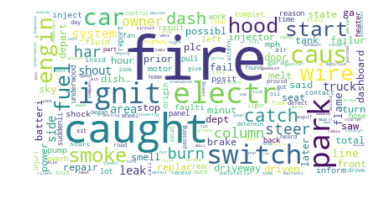

In [0]:
timestr = time.strftime("%Y%m%d-%H%M%S")
for i in range(5,11):
    a =  "Clusters_" + str(i)
    for j in range(i):
        print(i)
        temp_wordcloud = df11.loc[df11[str(a)] == j]
        text = " ".join(review for review in temp_wordcloud.CDESCR)
        #wordcloud = WordCloud(stopwords=['pleas', 'describ' , 'drive', 'vehicl','detail', 'caught','also','fail','caus','time', 'replac'] ,collocations = False , background_color="white").generate(text)
        wordcloud = WordCloud(collocations = False , background_color="white").generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        #plt.show()
        b = timestr + "Wordcloud" + "_" + str(i) + "_" + str(j)
        plt.savefig(str(b))
        #print(a)
        #print('j is' + str(j))
        #print('i is' + str(i))

In [0]:
#type(clusters)

In [0]:
#temp = np.array(clusters)

In [0]:
#temp

In [0]:
#c = np.where(temp == 0)
#print(c)

In [0]:
#c

In [0]:
#df6 = df5    

In [0]:
#df6['Cluster'] = clusters

In [0]:
#df6['Cluster'].dtype

In [0]:
#df6['Cluster_Str'] = df6['Cluster'].apply(str)

In [0]:
#df6['Cluster_Str'].dtype

In [0]:
#df6.columns.tolist()

In [0]:
grouped = df6.groupby(['MFR_NAME','Cluster_Str'])
Cluster_Mfr_Count = grouped.size()
type(Cluster_Mfr_Count)
Cluster_Mfr_Count_List = [Cluster_Mfr_Count]
Cluster_Mfr_Count_List

[MFR_NAME                       Cluster_Str
 AIRSTREAM, INC.                4               6
                                5               1
                                6               1
                                7               3
 ALFA LEISURE,INC.              4               7
                                7               2
 ALFA ROMEO, INCORPORATED       1               1
                                4               6
                                8               3
                                9               4
 ALL AMERICAN TIRE CO.          8               1
 AM GENERAL LLC                 1               1
                                4               9
                                5               2
                                6               2
                                9               2
 AMERICAN RACING EQUIPMENT      4               1
 AMERICAN SUZUKI MOTOR CORP.    0               8
                                1              34
      

In [0]:
temp_df = pd.DataFrame(Cluster_Mfr_Count, columns=['Count'])
temp_df
#Cluster_Mfr_Count_List[0]

Count
MFR_NAME                      Cluster_Str       
AIRSTREAM, INC.               4                6
                              5                1
                              6                1
                              7                3
ALFA LEISURE,INC.             4                7
                              7                2
ALFA ROMEO, INCORPORATED      1                1
                              4                6
                              8                3
                              9                4
ALL AMERICAN TIRE CO.         8                1
AM GENERAL LLC                1                1
                              4                9
                              5                2
                              6                2
                              9                2
AMERICAN RACING EQUIPMENT     4                1
AMERICAN SUZUKI MOTOR CORP.   0                8
                              1               34
                              2                2
                              3                9
                              4               93
                              5               11
                              6                7
                              7               11
                              8               18
                              9               36
ARA MANUFACTURING COMPANY     1                1
ARVINMERITOR AUTOMOTIVE       4                1
                              5                1
...                                          ...
Volvo Cars of N.A., LLC       7               20
                              8                9
                              9               29
WAL MART STORES INC.          4                1
WESTERN STAR TRUCKS, INC.     4                1
WESTERN TRAILER COMPANY       4                2
                              5                1
WHITE MOTOR CORPORATION       0                1
                              4                1
WILDER RVS                    4                1
WINNEBAGO INDUSTRIES, INC.    0                2
                              1                1
                              2                1
                              3               15
                              4               78
                              5               22
                              6               15
                              7               19
                              8                3
                              9               21
YAMAHA MOTOR CORPORATION, USA 0                4
                              3                1
                              4               12
                              7                4
                              8                3
                              9                1
YOKOHAMA                      4                6
                              5                1
                              8                1
YOKOHAMA TIRE CORPORATION     4                1

[845 rows x 1 columns]

In [0]:
 temp_df.to_excel("Cluster_Mfr_Count.xlsx",sheet_name='Sheet_name_1')

In [0]:
df6['MFR_NAME'].nunique()

227

In [0]:
#a = pd.value_counts(df6.MFR_NAME)
#a

In [0]:
#clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3, min_samples_leaf=5) 
  
# Performing training 
#clf_gini.fit(df6['MFR_NAME'], df6['Cluster_Str']) 

In [0]:
#To Create a corelation matrix between 2 categorical variables -  confusion matrix
#import pandas as pd
#confusion_matrix = pd.crosstab(df6['MFR_NAME'], df6['Cluster_Str'])

In [0]:
# To create the correalion matrix between 2 categorical variables
#def cramers_corrected_stat(confusion_matrix):
#    """ calculate Cramers V statistic for categorial-categorial association.
#        uses correction from Bergsma and Wicher, 
#        Journal of the Korean Statistical Society 42 (2013): 323-328
#    """
#    chi2 = ss.chi2_contingency(confusion_matrix)[0]
#    n = confusion_matrix.sum()
#    phi2 = chi2/n
#    r,k = confusion_matrix.shape
#    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
#    rcorr = r - ((r-1)**2)/(n-1)
#    kcorr = k - ((k-1)**2)/(n-1)
#    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [0]:
#cramers_corrected_stat(confusion_matrix)

In [0]:
#df6['MFR_NAME'].corr(df6['Cluster_Str'])

In [0]:
df12 = pd.read_csv('Cluster_Name_5to10.csv', dtype={"ORIG_EQUIP_YN": object, "DEALER_NAME": object , "DEALER_TEL": object , "DEALER_CITY": object , "DEALER_STATE" : object })

In [0]:
#WordCloud_array = np.array(df6)

5
5
5
5
5
6
6
6
6
6
6
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10


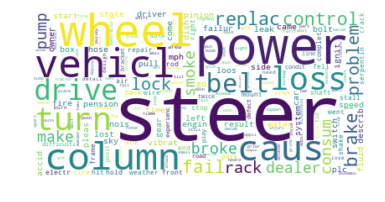

In [0]:
timestr = time.strftime("%Y%m%d-%H%M%S")
for i in range(5,11):
    a =  "Clusters_" + str(i)
    for j in range(i):
        print(i)
        temp_wordcloud = df11.loc[df11[str(a)] == j]
        text = " ".join(review for review in temp_wordcloud.CDESCR)
        #wordcloud = WordCloud(stopwords=['pleas', 'describ' , 'drive', 'vehicl','detail', 'caught','also','fail','caus','time', 'replac'] ,collocations = False , background_color="white").generate(text)
        wordcloud = WordCloud(collocations = False , background_color="white").generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        #plt.show()
        b = timestr + "Wordcloud" + "_" + str(i) + "_" + str(j)
        plt.savefig(str(b))
        #print(a)
        #print('j is' + str(j))
        #print('i is' + str(i))

In [0]:
temp_2 = df6.loc[df6['Cluster'] == 7]

In [0]:
temp_2

CMPLID     ODINO                               MFR_NAME     MAKETXT  \
0           1  958164.0               TOYOTA MOTOR CORPORATION      TOYOTA   
6           7  958173.0                     Ford Motor Company     LINCOLN   
12         13  958170.0                     Ford Motor Company     MERCURY   
13         14  958155.0                     Ford Motor Company        FORD   
25         26  958126.0                   GENERAL MOTORS CORP.   CHEVROLET   
27         28  958129.0                   GENERAL MOTORS CORP.   CHEVROLET   
33         34  958128.0            DAIMLERCHRYSLER CORPORATION       DODGE   
37         38  958188.0            DAIMLERCHRYSLER CORPORATION       DODGE   
41         42  958169.0                   GENERAL MOTORS CORP.         GEO   
53         54  958145.0                   GENERAL MOTORS CORP.    CADILLAC   
59         60  958162.0                   GENERAL MOTORS CORP.         GMC   
79         80  958186.0            DAIMLERCHRYSLER CORPORATION       DODGE   
88         89  958172.0                   GENERAL MOTORS CORP.   CHEVROLET   
100       101  958145.0                   GENERAL MOTORS CORP.    CADILLAC   
111       112  958230.0                   GENERAL MOTORS CORP.   CHEVROLET   
119       120  958212.0                   GENERAL MOTORS CORP.   CHEVROLET   
133       134  958201.0                     FORD MOTOR COMPANY     MERCURY   
136       137  958235.0  MITSUBISHI MOTORS NORTH AMERICA, INC.  MITSUBISHI   
142       143  958206.0                   GENERAL MOTORS CORP.   CHEVROLET   
143       144  958207.0             NISSAN NORTH AMERICA, INC.      NISSAN   
157       158  958233.0       TOYOTA MOTOR NORTH AMERICA, INC.       LEXUS   
165       166  958213.0                     General Motors LLC      SATURN   
170       171  958224.0                     General Motors LLC      SATURN   
172       173  958224.0                     General Motors LLC      SATURN   
179       180  958277.0                     Ford Motor Company        FORD   
190       191  958308.0                   GENERAL MOTORS CORP.   CHEVROLET   
198       199  958350.0                     CHRYSLER GROUP LLC       DODGE   
200       201  958286.0                   GENERAL MOTORS CORP.       BUICK   
202       203  958260.0            DAIMLERCHRYSLER CORPORATION       DODGE   
205       206  958285.0            DAIMLERCHRYSLER CORPORATION       DODGE   
...       ...       ...                                    ...         ...   
99833   99834  527542.0            DAIMLERCHRYSLER CORPORATION        JEEP   
99867   99868  817443.0                   GENERAL MOTORS CORP.   CHEVROLET   
99872   99873  819597.0                   GENERAL MOTORS CORP.   CHEVROLET   
99873   99874  819760.0                   GENERAL MOTORS CORP.   CHEVROLET   
99879   99880  819766.0                   GENERAL MOTORS CORP.   CHEVROLET   
99881   99882  820092.0            DAIMLERCHRYSLER CORPORATION    PLYMOUTH   
99884   99885  819599.0                   GENERAL MOTORS CORP.   CHEVROLET   
99885   99886  819751.0                   GENERAL MOTORS CORP.   CHEVROLET   
99890   99891  817871.0                   GENERAL MOTORS CORP.   CHEVROLET   
99891   99892  817871.0                   GENERAL MOTORS CORP.   CHEVROLET   
99892   99893  817933.0                   GENERAL MOTORS CORP.   CHEVROLET   
99893   99894  818132.0                   GENERAL MOTORS CORP.         GMC   
99895   99896  818987.0                   GENERAL MOTORS CORP.   CHEVROLET   
99896   99897  819037.0                   GENERAL MOTORS CORP.         GMC   
99898   99899  819119.0                   GENERAL MOTORS CORP.   CHEVROLET   
99901   99902  819597.0                   GENERAL MOTORS CORP.   CHEVROLET   
99903   99904  527528.0                   GENERAL MOTORS CORP.   CHEVROLET   
99907   99908  527531.0                    SAAB CARS USA, INC.        SAAB   
99911   99912  527529.0                     General Motors LLC   CHEVROLET   
99923   99924  527548.0      

In [0]:
text = " ".join(review for review in temp_2.CDESCR)

In [0]:
#text

In [0]:
wordcloud = WordCloud(stopwords=['pleas', 'describ' , 'drive', 'vehicl','detail', 'caught','also','fail','caus','time', 'replac'] ,collocations = False , background_color="white").generate(text)

In [0]:
#plt.imshow(wordcloud, interpolation='bilinear')
#plt.axis("off")
#plt.show()

In [0]:
tv_matrix

array([[0.41411137, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [0]:
# Trying to calculate Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tf_idf_matrix)

In [0]:
# Trying to create 
from scipy.cluster.hierarchy import ward, dendrogram

linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=titles);

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

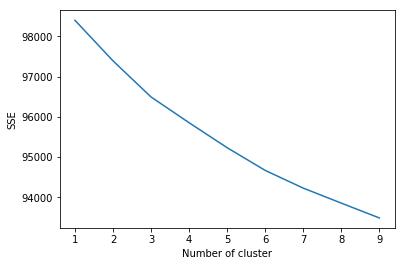

In [0]:
# Calculating the SSE for the Elbow Method
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(tf_idf_matrix)
    tf_idf_matrix["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [0]:
gmm = GaussianMixture(n_components=2)
gmm.fit(tf_idf_matrix)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [0]:
%time gmm = GaussianMixture(n_components=5 , max_iter = 1000, covariance_type='tied')
%time clf_5 = gmm.fit(tf_idf_matrix)
print('clfs printed')
%time bics_5 = clf_5.bic(tf_idf_matrix)
print("bics printed")
%time aics_5 = clf_5.aic(tf_idf_matrix)
print("aics printed")

Wall time: 2.5 ms
Wall time: 1h 50min 17s
clfs printed
Wall time: 2min 47s
bics printed
Wall time: 2min 29s
aics printed


In [0]:
print(bics_5)
print(aics_5)

-2145621387.109312
-2205344665.219713


In [0]:
%time gmm = GaussianMixture(n_components=6 , max_iter = 1000, covariance_type='tied')
%time clf_6 = gmm.fit(tf_idf_matrix)
print('clfs printed')
%time bics_6 = clf_6.bic(tf_idf_matrix)
print("bics printed" + str(bics_6))
%time aics_6 = clf_6.aic(tf_idf_matrix)
print("aics printed" + str(aics_6))

Wall time: 0 ns
Wall time: 1h 48min 36s
clfs printed
Wall time: 3min 13s
bics printed-2145848039.793816
Wall time: 3min 16s
aics printed-2205604983.79352


In [0]:
%time gmm = GaussianMixture(n_components=7 , max_iter = 1000, covariance_type='tied')
%time clf_7 = gmm.fit(tf_idf_matrix)
print('clfs printed')
%time bics_7 = clf_7.bic(tf_idf_matrix)
print("bics printed" + str(bics_7))
%time aics_7 = clf_7.aic(tf_idf_matrix)
print("aics printed" + str(aics_7))

Wall time: 0 ns
Wall time: 1h 48min 31s
clfs printed
Wall time: 4min 11s
bics printed-2145970663.2800887
Wall time: 4min 7s
aics printed-2205761273.1690955


In [0]:
%time gmm = GaussianMixture(n_components=8 , max_iter = 1000, covariance_type='tied')
%time clf_8 = gmm.fit(tf_idf_matrix)
print('clfs printed')
%time bics_8 = clf_8.bic(tf_idf_matrix)
print("bics printed" + str(bics_8))
%time aics_8 = clf_8.aic(tf_idf_matrix)
print("aics printed" + str(aics_8))

Wall time: 0 ns
Wall time: 2h 47min 47s
clfs printed
Wall time: 4min 31s
bics printed-2146114157.9275477
Wall time: 4min 58s
aics printed-2205938433.7058573


In [0]:
%time gmm = GaussianMixture(n_components=9 , max_iter = 1000, covariance_type='tied')
%time clf_9 = gmm.fit(tf_idf_matrix)
print('clfs printed')
%time bics_9 = clf_9.bic(tf_idf_matrix)
print("bics printed" + str(bics_9))
%time aics_9 = clf_9.aic(tf_idf_matrix)
print("aics printed" + str(aics_9))

Wall time: 0 ns
Wall time: 4h 52min 1s
clfs printed
Wall time: 5min 36s
bics printed-2146131428.6498668
Wall time: 5min 41s
aics printed-2205989370.317479


In [0]:
%time gmm = GaussianMixture(n_components=10 , max_iter = 1000, covariance_type='tied')
%time clf_10 = gmm.fit(tf_idf_matrix)
print('clfs printed')
%time bics_10 = clf_10.bic(tf_idf_matrix)
print("bics printed" + str(bics_10))
%time aics_10 = clf_10.aic(tf_idf_matrix)
print("aics printed" + str(aics_10))

Wall time: 7.05 ms
Wall time: 5h 31min 23s
clfs printed
Wall time: 5min 45s
bics printed-2146365527.581183
Wall time: 5min 33s
aics printed-2206257135.1380982


In [0]:
n_components = np.arange(5, 11)
print(n_components)

[ 5  6  7  8  9 10]


In [0]:
bics = [-2145621387.109312 , -2145848039.793816 , -2145970663.2800887 , -2146114157.9275477 , -2146131428.6498668 , -2146365527.581183]
aics = [-2205344665.219713 , -2205604983.79352 , -2205761273.1690955 , -2205938433.7058573 , -2205989370.317479 , -2206257135.1380982]
#n_components = np.arange(5, 10)
#plt.plot(n_components, bics, label = 'BIC')
#plt.plot(n_components, aics, label = 'AIC')
#plt.xlabel('n_components')
#plt.legend()
#plt.show()

In [0]:
type(tf_idf_matrix)

pandas.core.frame.DataFrame

In [0]:
%time pca = PCA(100)  
%time pca_output = pca.fit_transform(tf_idf_matrix)  
explained_variance = pca.explained_variance_ratio_
#explained_variance = pca_output.explained_variance_ratio_

Wall time: 0 ns
Wall time: 40.3 s


In [0]:
%time pca = PCA(1000)  
%time pca_output = pca.fit_transform(tf_idf_matrix)  
explained_variance = pca.explained_variance_ratio_

Wall time: 1.04 ms
Wall time: 2min 35s


In [0]:
%time pca = PCA(1500)  
%time pca_output = pca.fit_transform(tf_idf_matrix)  
explained_variance = pca.explained_variance_ratio_

Wall time: 4.51 ms
Wall time: 4min 32s


In [0]:
%time pca = PCA(2000)  
%time pca_output = pca.fit_transform(tf_idf_matrix)  
explained_variance = pca.explained_variance_ratio_

Wall time: 6.96 ms
Wall time: 8min 16s


In [0]:
%time pca = PCA(2500)  
%time pca_output = pca.fit_transform(tf_idf_matrix)  
explained_variance = pca.explained_variance_ratio_

Wall time: 0 ns
Wall time: 6min 49s


In [0]:
print(pca_output)
print(explained_variance)

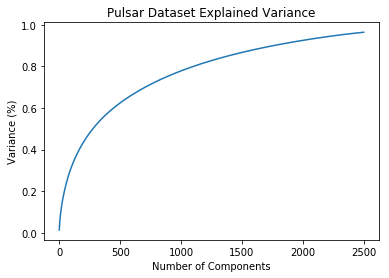

In [0]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [0]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.01384673 0.02602658 0.03656047 ... 0.96396802 0.96402576 0.96408347]


In [0]:
tf_idf_matrix_20000 = tf_idf_matrix[:20000]

In [0]:
# n_components = np.arange(5, 10)
# clfs = [GaussianMixture(n, max_iter = 1000, covariance_type='tied').fit(tf_idf_matrix_20000) for n in n_components]
# print('clfs printed')
# bics = [clf.bic(tf_idf_matrix) for clf in clfs]
# print("bics printed")
# aics = [clf.aic(tf_idf_matrix) for clf in clfs]
# print("aics printed")

# plt.plot(n_components, bics, label = 'BIC')
# plt.plot(n_components, aics, label = 'AIC')
# plt.xlabel('n_components')
# plt.legend()
# plt.show()

In [0]:
# plt.plot(n_components, bics, label = 'BIC')
# plt.plot(n_components, aics, label = 'AIC')

In [0]:
df6.columns

Index(['CMPLID', 'ODINO', 'MFR_NAME', 'MAKETXT', 'MODELTXT', 'YEARTXT',
       'CRASH', 'FAILDATE', 'FIRE', 'INJURED', 'DEATHS', 'CITY', 'STATE',
       'VIN', 'DATEA', 'LDATE', 'MILES', 'OCCURENCES', 'CDESCR', 'CMPL_TYPE',
       'POLICE_RPT_YN', 'PURCH_DT', 'ORIG_OWNER_YN', 'ANTI_BRAKES_YN',
       'CRUISE_CONT_YN', 'NUM_CYLS', 'DRIVE_TRAIN', 'FUEL_SYS', 'FUEL_TYPE',
       'TRANS_TYPE', 'VEH_SPEED', 'DOT', 'TIRE_SIZE', 'LOC_OF_TIRE',
       'TIRE_FAIL_TYPE', 'ORIG_EQUIP_YN', 'MANUF_DT', 'SEAT_TYPE',
       'RESTRAINT_TYPE', 'DEALER_NAME', 'DEALER_TEL', 'DEALER_CITY',
       'DEALER_STATE', 'DEALER_ZIP', 'PROD_TYPE', 'REPAIRED_YN',
       'INJURED_flag', 'setID', 'Words_in_CDESCR', 'CDESCR_Original',
       'Cluster', 'Cluster_Str'],
      dtype='object')

In [0]:
d = df6.loc[ : ,['Cluster_Str','INJURED' ,'DEATHS']]

In [0]:
# pd.isna(d)
d.dropna( inplace = True)

In [0]:
d

Cluster_Str  INJURED  DEATHS
0               7      0.0     0.0
1               9      0.0     0.0
2               2      0.0     0.0
3               4      0.0     0.0
4               4      0.0     0.0
5               3      0.0     0.0
6               7      0.0     0.0
7               9      0.0     0.0
8               9      0.0     0.0
9               9      0.0     0.0
10              1      0.0     0.0
11              8      0.0     0.0
12              7      0.0     0.0
13              7      0.0     0.0
14              4      1.0     0.0
15              9      0.0     0.0
16              4      0.0     0.0
17              8      0.0     0.0
18              4      0.0     0.0
19              2      0.0     0.0
20              4      0.0     0.0
21              3      0.0     0.0
22              4      0.0     0.0
23              4      0.0     0.0
24              8      0.0     0.0
25              7      0.0     0.0
26              4      0.0     0.0
27              7      0.0     0.0
28              1      1.0     0.0
29              6      0.0     0.0
...           ...      ...     ...
99621           7      1.0     0.0
99625           7      0.0     0.0
99632           2      1.0     0.0
99636           4      0.0     0.0
99637           6      0.0     0.0
99640           2      0.0     0.0
99641           5      0.0     0.0
99642           5      0.0     0.0
99645           5      0.0     0.0
99652           1      0.0     0.0
99662           9      0.0     0.0
99670           7      0.0     0.0
99674           7      1.0     0.0
99689           7      0.0     0.0
99743           7      3.0     0.0
99757           7      3.0     0.0
99761           9      0.0     0.0
99762           9      0.0     0.0
99763           4      1.0     0.0
99778           9      0.0     0.0
99790           1      0.0     0.0
99798           1      0.0     0.0
99844           4      0.0     0.0
99845           4      0.0     0.0
99871           0      0.0     0.0
99884           7      0.0     0.0
99895           7      0.0     0.0
99925           4      0.0     0.0
99979           4      1.0     0.0
99992           7      0.0     1.0

[71984 rows x 3 columns]

In [0]:
d.groupby(['Cluster_Str']).sum()

INJURED  DEATHS
Cluster_Str                 
0              134.0    21.0
1              895.0    60.0
2             1993.0    40.0
3               25.0    17.0
4             2293.0   119.0
5              250.0    19.0
6              176.0    15.0
7              656.0    25.0
8              487.0     6.0
9             1568.0   104.0

In [0]:
df6[df6['Cluster_Str'] == '4']['CDESCR']

3                     strut side door engin light malfunct
4                     strut side door engin light malfunct
14       foot brake driver shoulder belt restrain make ...
16               pulley broke lock drive turn steeer wheel
18              problem renolux date june child seat recal
20        ignit switch failur caus intermitt start problem
22       slide door fall hing time rear work door side ...
23       slide door fall hing time rear work door side ...
26                        transmiss purchas van brand blew
30        beam support frame crack result control lost mph
31                      windshield pit caus glare sunlight
32                                          come intermitt
34                               misalign caus veer center
35                      motor mount fail result engin nois
36                  head gasket blow engin lock need engin
38                                                     pad
44       side impact collis rear latch fail caus tailga.

In [0]:
corr = d.corr()

In [0]:
#We can use the NbClust package to find the most optimal value of k. It provides 30 indices for determining the number of clusters and proposes the best result.
# This is for R code
#NbClust(data=tf_idf_matrix, distance ="euclidean", min.nc=2, max.nc=15, method ="kmeans", index="all")

In [0]:
# Calculating the Silhoutte Coefficient for identifying the numbe of clusters
#for n_cluster in range(0, 10):
#     n_cluster = 5
#     kmeans = KMeans(n_clusters=n_cluster).fit(tf_idf_matrix)
#     label = kmeans.labels_
#     sil_coeff = silhouette_score(tf_idf_matrix, label, metric='euclidean')
#     print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

In [0]:
# Calculating the Silhoutte Coefficient for identifying the numbe of clusters

n_cluster = 5
kmeans = KMeans(n_clusters=n_cluster).fit(tf_idf_matrix)
label = kmeans.labels_
sil_coeff = silhouette_score(tf_idf_matrix, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=5, The Silhouette Coefficient is 0.015456383894875872


In [0]:
# Calculating the Silhoutte Coefficient for identifying the numbe of clusters

n_cluster = 6
kmeans = KMeans(n_clusters=n_cluster).fit(tf_idf_matrix)
label = kmeans.labels_
sil_coeff = silhouette_score(tf_idf_matrix, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

For n_clusters=6, The Silhouette Coefficient is 0.017559922700444503


In [0]:
# Calculating the Silhoutte Coefficient for identifying the numbe of clusters

n_cluster = 7
%time kmeans = KMeans(n_clusters=n_cluster).fit(tf_idf_matrix)
label = kmeans.labels_
%time sil_coeff = silhouette_score(tf_idf_matrix, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

Wall time: 11min 49s
Wall time: 18min 23s
For n_clusters=7, The Silhouette Coefficient is 0.018962066361086178


In [0]:
# Calculating the Silhoutte Coefficient for identifying the numbe of clusters

n_cluster = 8
%time kmeans = KMeans(n_clusters=n_cluster).fit(tf_idf_matrix)
label = kmeans.labels_
%time sil_coeff = silhouette_score(tf_idf_matrix, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

Wall time: 12min 36s
Wall time: 15min 23s
For n_clusters=8, The Silhouette Coefficient is 0.019911535466810504


In [0]:
# Calculating the Silhoutte Coefficient for identifying the numbe of clusters

n_cluster = 9
%time kmeans = KMeans(n_clusters=n_cluster).fit(tf_idf_matrix)
label = kmeans.labels_
%time sil_coeff = silhouette_score(tf_idf_matrix, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

Wall time: 10min
Wall time: 15min 30s
For n_clusters=9, The Silhouette Coefficient is 0.020676442294220145


In [0]:
# Calculating the Silhoutte Coefficient for identifying the numbe of clusters

n_cluster = 10
%time kmeans = KMeans(n_clusters=n_cluster).fit(tf_idf_matrix)
label = kmeans.labels_
%time sil_coeff = silhouette_score(tf_idf_matrix, label, metric='euclidean')
print("For n_clusters={}, The Silhouette Coefficient is {}".format(n_cluster, sil_coeff))

Wall time: 13min 30s
Wall time: 18min 16s
For n_clusters=10, The Silhouette Coefficient is 0.021099331501334643


In [0]:
# k means determine k - Another elbow method
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(tv_matrix)
    kmeanModel.fit(tv_matrix)
    distortions.append(sum(np.min(cdist(tv_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tv_matrix.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [0]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

cluster_hiearchical = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster_hiearchical.fit_predict(tf_idf_matrix)  

MemoryError: 

MemoryError: 

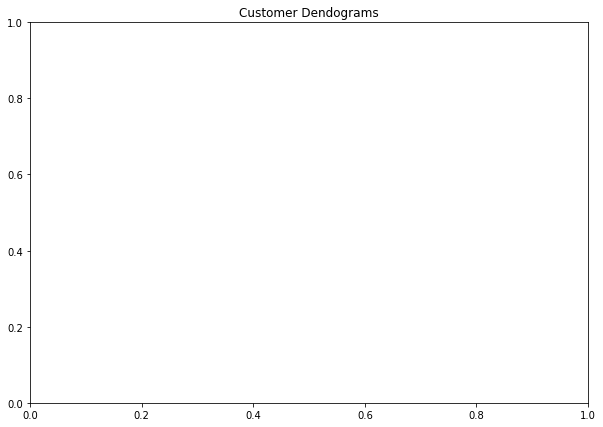

In [0]:
# Dendogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(tf_idf_matrix, method='ward'))  

In [0]:
#from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from scipy.cluster import  hierarchy

#Vectorizing
#X = CountVectorizer().fit_transform(docs)
#X = TfidfTransformer().fit_transform(X)
#Clustering
#tf_idf_matrix = tf_idf_matrix.todense()
threshold = 0.1
Z = hierarchy.linkage(tf_idf_matrix,"average", metric="cosine")
C = hierarchy.fcluster(Z, threshold, criterion="distance")


MemoryError: 

In [0]:
df_after_modification_Cluster_Clean = df_after_modification_Cluster

In [0]:
df_after_modification_Cluster.CDESCR

0                                                         
1                                                         
2                                                         
3                                                         
4                                                         
5                                                         
6                                                         
7                                                         
8                                                         
9                                                         
10                                                        
11                                                        
12                                                        
13                                                        
14                                                        
15                                                        
16                                                      

In [0]:
df_after_modification_Cluster_Clean.CDESCR[0]

'ab system mph'

In [0]:
#s = "how much for the maple syrup? $20.99? That's ridiculous!!! don't n't"
s = "take vehicl brake pad rotor replac mile salt solvent road*ak"
print(type(s))
re.sub(r'[^\w]', ' ', s)

<class 'str'>


'take vehicl brake pad rotor replac mile salt solvent road ak'

In [0]:
#s = "how much for the maple syrup? $20.99? That's ridiculous!!!"
k = 0
for i in range(len(df_after_modification_Cluster_Clean)):
#for i in range(10):
    print(k)
    sent = df_after_modification_Cluster_Clean.CDESCR[i]
#    print(sent)
#    print(type(sent))
    df_after_modification_Cluster_Clean.CDESCR[i] = re.sub(r'[^\w]', ' ', sent)
    k += 1

0
1
2
3
4
5


C:\Users\shaunakhanda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
279
28

KeyboardInterrupt: 

In [0]:
s = "how much for the maple syrup? $20.99? That's ricidulous!!!"
whitelist = string.punctuation
new_s = ''.join(c for c in s if c in whitelist)

In [0]:
new_s

"?$.?'!!!"

In [0]:
whitelist = string.punctuation
k = 0
for i in range(len(df_after_modification_Cluster_Clean)):
    print(k)
    df_after_modification_Cluster_Clean.CDESCR[i] = ''.join(c for c in df_after_modification_Cluster_Clean.CDESCR[i] if c in whitelist)
    k+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13


C:\Users\shaunakhanda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208


KeyboardInterrupt: 

In [0]:
new_s

''

In [0]:
df_after_modification_Cluster_Clean.CDESCR

0                                                         
1                                                         
2                                                         
3                                                         
4                                                         
5                                                         
6                                                         
7                                                         
8                                                         
9                                                         
10                                                        
11                                                        
12                                                        
13                                                        
14                                                        
15                                                        
16                                                      

In [0]:
df_after_modification_Cluster_Clean.CDESCR[81941]

'take vehicl brake pad rotor replac mile salt solvent road*ak'

In [0]:
WordCloud_array

array([[1, 958164.0, 'TOYOTA MOTOR CORPORATION', ..., 6,
        'ABS SYSTEM FAILURE, AT 20MPH.  TT', 0],
       [2, 958156.0, 'TOYOTA MOTOR CORPORATION', ..., 11,
        'PARKED ON FLAT SURFACE EMERGENCY BRAKING ENGAGED VEHICLE ROLLED REARWARD.  TT',
        4],
       [3, 958124.0, 'TOYOTA MOTOR CORPORATION', ..., 16,
        'UPON FRONTAL COLLISION, AIR BAG FAILED TO DEPLOY. VEHICLE CLASSIFIED AS TOTALED. PLEASE DESCRIBE DETAILS.  TT',
        2],
       ...,
       [99998, 522520.0, 'TOYOTA MOTOR NORTH AMERICA, INC.', ..., 30,
        'EXHAUST PIPE BROKE DUE TO A DEFECT EITHER IN THE PIPE ITSELF OR IN THE INSTALLATION OF THE PIPE. ALSO REPLACED ENGINE MOTOR MOUNTS/VALVE SEALS AND UPPER ENGINE SUPPORTS.  *AK',
        4],
       [99999, 522520.0, 'TOYOTA MOTOR NORTH AMERICA, INC.', ..., 30,
        'EXHAUST PIPE BROKE DUE TO A DEFECT EITHER IN THE PIPE ITSELF OR IN THE INSTALLATION OF THE PIPE. ALSO REPLACED ENGINE MOTOR MOUNTS/VALVE SEALS AND UPPER ENGINE SUPPORTS.  *AK',
        

In [0]:
temp_1 = np.where(WordCloud_array.Cluster > 4)

AttributeError: 'numpy.ndarray' object has no attribute 'Cluster'

In [0]:
#temp[c]

In [0]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

In [0]:
df_after_modification_POS.CDESCR.head()

0                               abs system failure mph
1    parked surface emergency braking engaged vehic...
2    collision air bag failed vehicle classified to...
3    noise passenger side door engine light malfunc...
4    noise passenger side door engine light malfunc...
Name: CDESCR, dtype: object

In [0]:
word_tokenize('print hello checking for tokenization')

['print', 'hello', 'checking', 'for', 'tokenization']

In [0]:
filtered_sentences[1]

['parked',
 'surface',
 'emergency',
 'braking',
 'engaged',
 'vehicle',
 'rolled',
 'rearward']

In [0]:
bigrams_list = []
j = 0
#for i in range(len(filtered_sentences)):
for i in range(len(filtered_sentences)):
    print(j)
    #bigrams=ngrams(filtered_sentences[i],2)
    bigrm_list = list(nltk.bigrams(filtered_sentences[i]))
    #bigrams_list = map(' '.join, bigrm_list)
    #print(bigrams_list)
    #print(*map(' '.join, bigrm_list), sep=', ')
    bigrams_list.append(bigrm_list)
    #list(nltk.bigrams(nltk_tokens)))
    j+=1
#print(bigrams_list)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
#bigrams_list

In [0]:
bigrams_list_append = []
for i in range(len(bigrams_list)):
    bigrams_list_append = bigrams_list_append + bigrams_list[i]

In [0]:
#print(bigrams_list_append)

In [0]:
from collections import Counter
word_bigrams_list = Counter(bigrams_list_append)

In [0]:
for letter, count in word_bigrams_list.most_common(30000): 
    print('%s: %d' % (letter, count)) 

('please', 'describe'): 6811
('seat', 'belt'): 5307
('describe', 'details'): 2626
('brakes', 'failed'): 2237
('driving', 'vehicle'): 2146
('failed', 'causing'): 2131
('driver', 'side'): 2106
('air', 'bag'): 2027
('causing', 'vehicle'): 2020
('passenger', 'side'): 1825
('power', 'steering'): 1782
('caught', 'fire'): 1739
('consumer', 'states'): 1686
('steering', 'wheel'): 1655
('air', 'bags'): 1578
('abs', 'brakes'): 1569
('applying', 'brakes'): 1553
('driver', 'seat'): 1473
('abs', 'brake'): 1366
('brake', 'failure'): 1341
('ignition', 'switch'): 1288
('steering', 'column'): 1272
('stopping', 'distance'): 1268
('brake', 'pedal'): 1254
('driver', 'passenger'): 1205
('side', 'air'): 1179
('cruise', 'control'): 1163
('seat', 'belts'): 1161
('dealer', 'replaced'): 1147
('brakes', 'applied'): 1146
('brake', 'pads'): 1145
('extended', 'stopping'): 1123
('side', 'seat'): 1111
('air', 'deploy'): 1084
('master', 'cylinder'): 1039
('causing', 'loss'): 1029
('driving', 'mph'): 1015
('speed', 'mph

In [0]:
type(word_bigrams_list)

collections.Counter

In [0]:
print(word_bigrams_list)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
# Trying to implement the bigram list method
import nltk
from nltk.tokenize import word_tokenize
text = "to be or not to be"
tokens = nltk.word_tokenize(text)
print(text.split())
print(tokens)
bigrm = nltk.bigrams(tokens)
print(bigrm)
print(*map(' '.join, bigrm), sep=', ')

['to', 'be', 'or', 'not', 'to', 'be']
['to', 'be', 'or', 'not', 'to', 'be']
<generator object bigrams at 0x000002A9C2E697C8>
to be, be or, or not, not to, to be


In [0]:
bigrams_list

[<generator object ngrams at 0x000002A9BBBA7D68>,
 <generator object ngrams at 0x000002A9BBBA70C0>,
 <generator object ngrams at 0x000002A9BBBA7228>,
 <generator object ngrams at 0x000002A9BBBA7138>,
 <generator object ngrams at 0x000002A9BBBA7318>,
 <generator object ngrams at 0x000002A9BBBA72A0>,
 <generator object ngrams at 0x000002A9BBBA7390>,
 <generator object ngrams at 0x000002A9BBBA7408>,
 <generator object ngrams at 0x000002A9BBBA74F8>,
 <generator object ngrams at 0x000002A9BBBA7480>,
 <generator object ngrams at 0x000002A9BBBA7570>,
 <generator object ngrams at 0x000002A9BBBA75E8>,
 <generator object ngrams at 0x000002A9BBBA7660>,
 <generator object ngrams at 0x000002A9BBBA76D8>,
 <generator object ngrams at 0x000002A9BBBA7750>,
 <generator object ngrams at 0x000002A9BBBA77C8>,
 <generator object ngrams at 0x000002A9BBBA7840>,
 <generator object ngrams at 0x000002A9BBBA78B8>,
 <generator object ngrams at 0x000002A9BBBA7930>,
 <generator object ngrams at 0x000002A9BBBA79A8>,


In [0]:
mary = 'Mary had a little lamb'

In [0]:
mwords = mary.split() 
mwords

['Mary', 'had', 'a', 'little', 'lamb']

In [0]:
type(mwords)

list

In [0]:
' '.join(mwords)

'Mary had a little lamb'

In [0]:
lst1 = ['a', 'b', 'c']
lst2 = ['d', 'e']
lst1 += lst2
lst1


['a', 'b', 'c', 'd', 'e']

In [0]:
#type(Words)

list

In [0]:
word_list_4 = []
i = 0
for i in range(len(filtered_sentences)):
    print(i)
    word_list_4 = word_list_4 + filtered_sentences[i]
    i+=1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [0]:
len(word_list_4)

884639

In [0]:
word_list_4[0]

'abs'

In [0]:
word_count_dict = {}
for i in filtered_sentences:
    for j in i:
        if j not in word_count_dict:
            word_count_dict[j]=1
        else:
            word_count_dict[j]=word_count_dict[str(j)]+1

In [0]:
word_count_dict

{'abs': 6169,
 'system': 4939,
 'failure': 7322,
 'mph': 5304,
 'parked': 1457,
 'surface': 302,
 'emergency': 1029,
 'braking': 2784,
 'engaged': 295,
 'vehicle': 32855,
 'rolled': 487,
 'rearward': 48,
 'collision': 2264,
 'air': 7113,
 'bag': 2088,
 'failed': 15363,
 'deploy': 3342,
 'classified': 2,
 'totaled': 335,
 'please': 8337,
 'describe': 7304,
 'details': 3360,
 'strut': 167,
 'noise': 3030,
 'passenger': 4488,
 'side': 7155,
 'door': 4887,
 'engine': 7161,
 'malfunction': 371,
 'tires': 1332,
 'show': 43,
 'wear': 1048,
 'steel': 115,
 'belts': 1696,
 'offering': 3,
 'replace': 1209,
 'brake': 13909,
 'pedal': 3306,
 'push': 108,
 'rod': 552,
 'retainer': 99,
 'properly': 1339,
 'installed': 359,
 'causing': 13642,
 'brakes': 17303,
 'fail': 972,
 'resulting': 3498,
 'recall': 2943,
 'repairs': 972,
 'v-': 147,
 'stalls': 1020,
 'speed': 2960,
 'loss': 3107,
 'steering': 7863,
 'ability': 278,
 'vehicles': 652,
 'sun': 140,
 'glass': 316,
 'flew': 333,
 'driving': 11754,
 

In [0]:
len(word_count_dict)

NameError: name 'word_count_dict' is not defined

In [0]:
sorted(word_count_dict.values(), reverse = True)

[32855,
 17303,
 15363,
 13909,
 13642,
 12357,
 11754,
 11116,
 9417,
 9311,
 8885,
 8337,
 7941,
 7863,
 7322,
 7304,
 7161,
 7155,
 7113,
 6212,
 6169,
 5578,
 5523,
 5436,
 5304,
 5176,
 4987,
 4939,
 4887,
 4683,
 4565,
 4532,
 4488,
 4212,
 4193,
 4077,
 3755,
 3586,
 3498,
 3360,
 3342,
 3306,
 3207,
 3196,
 3142,
 3135,
 3107,
 3076,
 3030,
 2960,
 2955,
 2943,
 2882,
 2784,
 2722,
 2699,
 2679,
 2673,
 2669,
 2605,
 2523,
 2523,
 2491,
 2476,
 2474,
 2439,
 2396,
 2331,
 2291,
 2264,
 2243,
 2211,
 2209,
 2156,
 2088,
 2061,
 2047,
 2034,
 2024,
 2019,
 1922,
 1916,
 1895,
 1881,
 1836,
 1835,
 1808,
 1806,
 1793,
 1782,
 1776,
 1736,
 1703,
 1696,
 1676,
 1668,
 1651,
 1604,
 1596,
 1576,
 1572,
 1566,
 1552,
 1551,
 1544,
 1539,
 1533,
 1514,
 1473,
 1457,
 1456,
 1452,
 1448,
 1410,
 1391,
 1386,
 1374,
 1371,
 1343,
 1339,
 1332,
 1315,
 1293,
 1287,
 1259,
 1251,
 1249,
 1217,
 1209,
 1191,
 1169,
 1148,
 1134,
 1134,
 1133,
 1107,
 1102,
 1098,
 1091,
 1085,
 1082,
 1075

In [0]:
# word_list_4 = []
# k = 0
# for i in filtered_sentences[:20]:
#     print(k)
#     for w in i:
#         #print(w)
#         if w in filtered_sentences[i]:
#             word_list_4.append(w)
#             #word_list_4.append(ps.stem(w))
#     k+=1                   
# #print(word_list_4)

In [0]:
# for_counter = []
# for i in filtered_sentences:
#     for j in range(1):
#         for_counter.append(i)

In [0]:
# for_counter

In [0]:
word_list_4

['abs',
 'system',
 'failure',
 'mph',
 'parked',
 'surface',
 'emergency',
 'braking',
 'engaged',
 'vehicle',
 'rolled',
 'rearward',
 'collision',
 'air',
 'bag',
 'failed',
 'deploy',
 'vehicle',
 'classified',
 'totaled',
 'please',
 'describe',
 'details',
 'strut',
 'noise',
 'passenger',
 'side',
 'door',
 'engine',
 'malfunction',
 'strut',
 'noise',
 'passenger',
 'side',
 'door',
 'engine',
 'malfunction',
 'tires',
 'show',
 'wear',
 'steel',
 'belts',
 'offering',
 'replace',
 'tires',
 'brake',
 'pedal',
 'push',
 'rod',
 'retainer',
 'properly',
 'installed',
 'causing',
 'brakes',
 'fail',
 'resulting',
 'recall',
 'repairs',
 'v-',
 'vehicle',
 'stalls',
 'speed',
 'resulting',
 'loss',
 'steering',
 'braking',
 'ability',
 'vehicle',
 'stalls',
 'speed',
 'resulting',
 'loss',
 'steering',
 'braking',
 'ability',
 'vehicles',
 'sun',
 'glass',
 'flew',
 'driving',
 'seat',
 'belt',
 'retractor',
 'operate',
 'exhaust',
 'system',
 'fails',
 'please',
 'describe',
 'de

In [0]:
from collections import Counter
word_list_Counter_4 = Counter(word_list_4)

In [0]:
word_list_Counter_4.most_common()

[('vehicle', 32855),
 ('brakes', 17303),
 ('failed', 15363),
 ('brake', 13909),
 ('causing', 13642),
 ('seat', 12357),
 ('driving', 11754),
 ('replaced', 11116),
 ('driver', 9417),
 ('consumer', 9311),
 ('belt', 8885),
 ('please', 8337),
 ('dealer', 7941),
 ('steering', 7863),
 ('failure', 7322),
 ('describe', 7304),
 ('engine', 7161),
 ('side', 7155),
 ('air', 7113),
 ('fire', 6212),
 ('abs', 6169),
 ('also', 5578),
 ('transmission', 5523),
 ('problem', 5436),
 ('mph', 5304),
 ('accident', 5176),
 ('car', 4987),
 ('system', 4939),
 ('door', 4887),
 ('control', 4683),
 ('fuel', 4565),
 ('*sd', 4532),
 ('passenger', 4488),
 ('times', 4212),
 ('power', 4193),
 ('broke', 4077),
 ('wheel', 3755),
 ('stop', 3586),
 ('resulting', 3498),
 ('details', 3360),
 ('deploy', 3342),
 ('pedal', 3306),
 ('floor', 3207),
 ('went', 3196),
 ('owner', 3142),
 ('lock', 3135),
 ('loss', 3107),
 ('rotors', 3076),
 ('noise', 3030),
 ('speed', 2960),
 ('rear', 2955),
 ('recall', 2943),
 ('hit', 2882),
 ('braki

In [0]:
type(word_list_Counter_4)

collections.Counter

In [0]:
#d = Counter({'fb_view_listing': 76, 'fb_homescreen': 63, 'rt_view_listing': 50, 'rt_home_start_app': 46, 'fb_view_wishlist': 39, 'fb_view_product': 37, 'fb_search': 29, 'rt_view_product': 23, 'fb_view_cart': 22, 'rt_search': 12, 'rt_view_cart': 12, 'add_to_cart': 2, 'create_campaign': 1, 'fb_connect': 1, 'sale': 1, 'guest_sale': 1, 'remove_from_cart': 1, 'rt_transaction_confirmation': 1, 'login': 1})
df_Word_Counter = pd.DataFrame.from_dict(word_list_Counter_4, orient='index').reset_index()
df_Word_Counter

index      0
0                  abs   6169
1               system   4939
2              failure   7322
3                  mph   5304
4               parked   1457
5              surface    302
6            emergency   1029
7              braking   2784
8              engaged    295
9              vehicle  32855
10              rolled    487
11            rearward     48
12           collision   2264
13                 air   7113
14                 bag   2088
15              failed  15363
16              deploy   3342
17          classified      2
18             totaled    335
19              please   8337
20            describe   7304
21             details   3360
22               strut    167
23               noise   3030
24           passenger   4488
25                side   7155
26                door   4887
27              engine   7161
28         malfunction    371
29               tires   1332
...                ...    ...
18605            spabs      1
18606             peal      1
18607   applyingbrakes      1
18608           towner      1
18609     restart.this      1
18610           vaughn      1
18611         involevd      1
18612          jimmied      1
18613        out.there      1
18614       vehicleany      1
18615       trunk.this      1
18616              v/v      1
18617     contaminates      1
18618         readable      1
18619       out/locked      1
18620  sometimsesgoing      1
18621            systm      1
18622              onc      1
18623           ceases      1
18624       conidtions      3
18625   control.system      3
18626        cascading      1
18627          pooling      1
18628           wedges      1
18629         crakcing      1
18630              eca      1
18631            plugt      1
18632      windshieild      1
18633            paseo      1
18634     mounts/valve      3

[18635 rows x 2 columns]

In [0]:
df_Word_Counter = df_Word_Counter.rename(columns={'index':'words', 0:'count'})
df_Word_Counter

words  count
0                  abs   6169
1               system   4939
2              failure   7322
3                  mph   5304
4               parked   1457
5              surface    302
6            emergency   1029
7              braking   2784
8              engaged    295
9              vehicle  32855
10              rolled    487
11            rearward     48
12           collision   2264
13                 air   7113
14                 bag   2088
15              failed  15363
16              deploy   3342
17          classified      2
18             totaled    335
19              please   8337
20            describe   7304
21             details   3360
22               strut    167
23               noise   3030
24           passenger   4488
25                side   7155
26                door   4887
27              engine   7161
28         malfunction    371
29               tires   1332
...                ...    ...
18605            spabs      1
18606             peal      1
18607   applyingbrakes      1
18608           towner      1
18609     restart.this      1
18610           vaughn      1
18611         involevd      1
18612          jimmied      1
18613        out.there      1
18614       vehicleany      1
18615       trunk.this      1
18616              v/v      1
18617     contaminates      1
18618         readable      1
18619       out/locked      1
18620  sometimsesgoing      1
18621            systm      1
18622              onc      1
18623           ceases      1
18624       conidtions      3
18625   control.system      3
18626        cascading      1
18627          pooling      1
18628           wedges      1
18629         crakcing      1
18630              eca      1
18631            plugt      1
18632      windshieild      1
18633            paseo      1
18634     mounts/valve      3

[18635 rows x 2 columns]

In [0]:
type(df_Word_Counter)

pandas.core.frame.DataFrame

In [0]:
df_Word_Counter[df_Word_Counter['count'] > 1]

words  count
0                       abs   6169
1                    system   4939
2                   failure   7322
3                       mph   5304
4                    parked   1457
5                   surface    302
6                 emergency   1029
7                   braking   2784
8                   engaged    295
9                   vehicle  32855
10                   rolled    487
11                 rearward     48
12                collision   2264
13                      air   7113
14                      bag   2088
15                   failed  15363
16                   deploy   3342
17               classified      2
18                  totaled    335
19                   please   8337
20                 describe   7304
21                  details   3360
22                    strut    167
23                    noise   3030
24                passenger   4488
25                     side   7155
26                     door   4887
27                   engine   7161
28              malfunction    371
29                    tires   1332
...                     ...    ...
18501                  echu      3
18502             breakaway      2
18508        suspension/abs      3
18511           equilibrate      6
18512            beams/fuel      6
18513  worksintermittently/      6
18520               chewing      3
18521         brakes/master      2
18523             diverting      3
18529                 frake      2
18538         intermttently      3
18547       conditions.this      2
18548             associate      5
18549        dbearings/fuel      5
18553              sttering      3
18554            gasket/abs      9
18563               runaway      4
18571          backup.owner      2
18572          engine/power      2
18579               nudging      2
18584               spinout      2
18595            quantities      2
18596                milees      2
18597              withdrew      2
18598                cocked      3
18599      cylinder/leaking      3
18602        responsiveness      2
18624            conidtions      3
18625        control.system      3
18634          mounts/valve      3

[9521 rows x 2 columns]

In [0]:
 df_Word_Counter.to_excel("Output_Word_Count.xlsx")

In [0]:
df.CDESCR

0                                 abs system failure, mph.
1        parked flat surface emergency braking engaged ...
2        upon frontal collision, air bag failed deploy....
3        strut bad noise passenger side door engine lig...
4        strut bad noise passenger side door engine lig...
5        front tires show excessive wear steel belts. n...
6        brake pedal push rod retainer properly install...
7        vehicle stalls high speed, resulting loss stee...
8        vehicle stalls high speed, resulting loss stee...
9                    vehicles sun roof glass flew driving.
10                rear middle seat belt retractor operate.
11          exhaust system fails; please describe details.
12              braking system failure without abs brakes.
13       brake application vehicle exhibits grinding no...
14       rear ended foot brake, drivers shoulder belt r...
15       vehicle stalls high speed, resulting loss stee...
16       pulley broke off, everything locked up, drivin.

In [0]:
df.CDESCR[71]

'upon impact, during frontal crash at approx. 10 mph, 2:00 on front bumper, drivers/passengers airbags failed to deploy, resulting in injury.   tt'

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df=0., max_df=1.)
cv_matrix = cv.fit_transform(df.CDESCR)
cv_matrix = cv_matrix.toarray()
cv_matrix

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [0]:
type(cv_matrix)

In [0]:
cv_matrix.shape

In [0]:
bv = CountVectorizer(ngram_range=(1,3) , min_df= 500 , max_df=1. )
bv_matrix = bv.fit_transform(df.CDESCR)

bv_matrix = bv_matrix.toarray()
vocab = bv.get_feature_names()
temp = pd.DataFrame(bv_matrix, columns=vocab)

In [0]:
a = temp.values

In [0]:
np.where(a[:] > 1)

(array([    3,     4,     5, ..., 99998, 99998, 99998], dtype=int64),
 array([627, 627, 680, ..., 360, 366, 627], dtype=int64))

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

#tv = TfidfVectorizer(min_df=0., max_df=1., use_idf=True)
tv = TfidfVectorizer(ngram_range=(1,2) , min_df= 500, max_df=1., use_idf=True)
tv_matrix = tv.fit_transform(df.CDESCR)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

00  00 position  000  000 miles   10   12  12 00   20    30   35 ...   \
0      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
1      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
2      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
3      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
4      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
5      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
6      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
7      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
8      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
9      0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
10     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
11     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
12     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
13     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
14     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.27  0.0 ...    
15     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
16     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
17     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
18     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
19     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
20     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
21     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
22     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
23     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
24     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
25     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
26     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
27     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
28     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
29     0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
...    ...          ...  ...        ...  ...  ...    ...  ...   ...  ... ...    
99970  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99971  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99972  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99973  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99974  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99975  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99976  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99977  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99978  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99979  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99980  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99981  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99982  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99983  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99984  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99985  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99986  0.0          0.0  0.0        0.0  0.0  0.0    0.0  0.0  0.00  0.0 ...    
99987  0.0          0.0  0.0        0.0

In [0]:
# Tryin to create a TF-IDF vector for our dataset
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()
# matrix = vectorizer.fit_transform(df.CDESCR)
# print(matrix)

In [0]:
#type(matrix)

In [0]:
# Printing the feature names corresponding to the above TF-IDF vector
# for i, feature in enumerate(vectorizer.get_feature_names()):
#     print(i, feature)

In [0]:
# # Trying to implement DB scan algorithm 
# a = matrix.todense() # <-- This line was needed to resolve the isse

# db = DBSCAN(eps=0.3, min_samples=10).fit(a)